# Labolatorium 4:  Interpolacja
Jakub Fabia

## Importowanie bibliotek
Importuję niezbędne biblioteki. Biblioteki te obejmują:
- `DataFrames` do manipulacji danymi w formie tabelarycznej,
- `Plots` do tworzenia wykresów,
- `Statistics` do obliczeń statystycznych,
- `Polynomials` do pracy z wielomianami i ich dopasowywania,
- `Interpolations` do wykonywania interpolacji danych.

In [1]:
using Plots, Interpolations, Polynomials, DataFrames, Statistics

## Wartości testowe

Definiuję przedziały wartości na których będą testowane funkcje w zadaniach

In [2]:
x_vals =  1:1:10
y_vals = [rand() for x in x_vals]

x_range = 1:0.001:10

1.0:0.001:10.0

## Zadanie 1 - Metoda Lagrange'a

In [3]:
function lagrange_basis(x, i, x_vals)
    n = length(x_vals)
    L = 1.0
    for j in 1:n
        if j != i
            L *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        end
    end
    return L
end

lagrange_basis (generic function with 1 method)

In [4]:
function lagrange_interpolation(x, x_vals, y_vals)
    n = length(x_vals)
    P = 0.0
    for i in 1:n
        P += y_vals[i] * lagrange_basis(x, i, x_vals)
    end
    return P
end

lagrange_interpolation (generic function with 1 method)

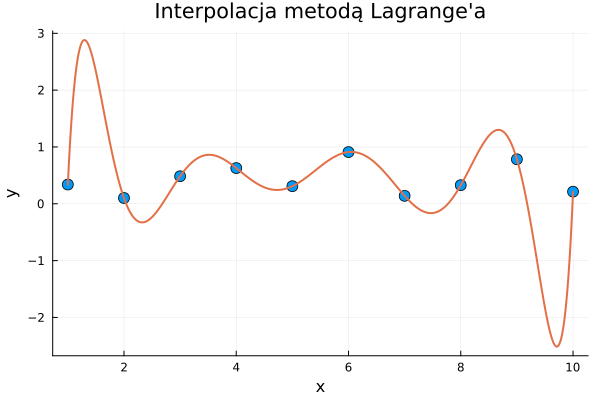

In [5]:
lagr_interp = [lagrange_interpolation(x, x_vals, y_vals) for x in x_range]

scatter(x_vals, y_vals, legend=false, markersize=6)
plot!(x_range, lagr_interp, legend=false, linewidth=2)
xlabel!("x")
ylabel!("y")
title!("Interpolacja metodą Lagrange'a")

## Zadanie 2 - Metoda Ilorazów Różnicowych Newtona'a

In [6]:
function NewtonInterpolation(x_vals, y_vals)
    n = length(x_vals)
    coef = copy(y_vals)
    
    for j in 2:n
        for i in n:-1:j
            coef[i] = (coef[i] - coef[i-1]) / (x_vals[i] - x_vals[i-j+1])
        end
    end
    return (x_vals, coef)
end

NewtonInterpolation (generic function with 1 method)

In [7]:
function newton_evaluate(newt, x)
    x_vals, coef = newt
    n = length(x_vals)
    result = coef[n]
    
    for i in (n-1):-1:1
        result = result * (x - x_vals[i]) + coef[i]
    end
    return result
end

newton_evaluate (generic function with 1 method)

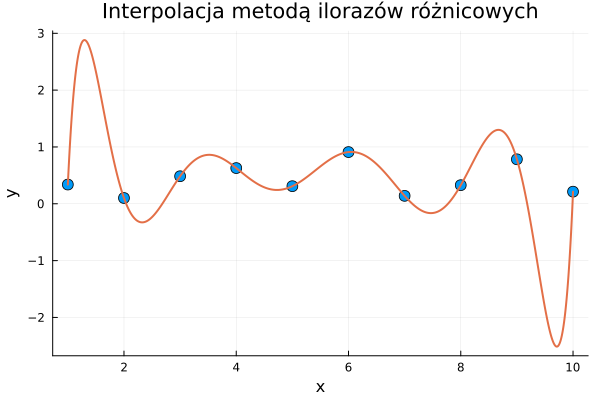

In [8]:
newt = NewtonInterpolation(x_vals, y_vals)
newton_interp = [newton_evaluate(newt, x) for x in x_range]

scatter(x_vals, y_vals, legend=false, markersize=6)
plot!(x_range, newton_interp, legend=false, linewidth=2)
xlabel!("x")
ylabel!("y")
title!("Interpolacja metodą ilorazów różnicowych")

## Zadanie 3 - Funkcja fit z Polynomials.jl

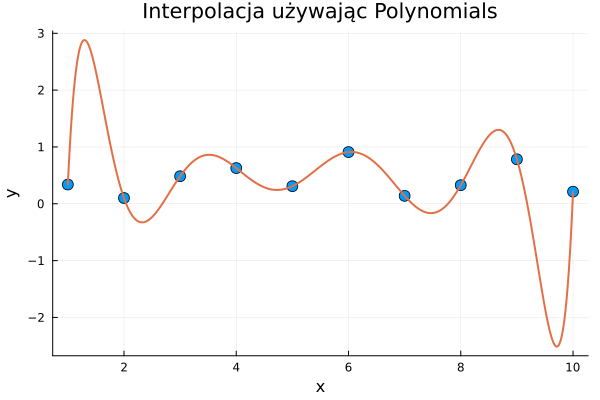

In [9]:
f = fit(x_vals, y_vals)
poly_interp = [f(x) for x in x_range]
scatter(x_vals, y_vals, legend=false, markersize=6)
plot!(x_range, poly_interp, legend=false, linewidth=2)
xlabel!("x")
ylabel!("y")
title!("Interpolacja używając Polynomials")

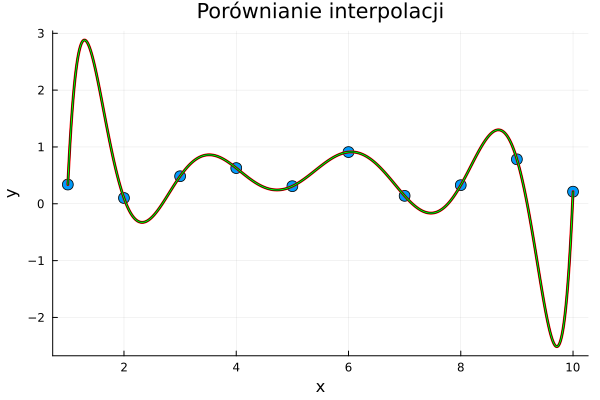

In [10]:
scatter(x_vals, y_vals, legend=false, markersize=6)
plot!(x_range, lagr_interp, label="Lagrange'a", linewidth=3, color="#ff0000")
plot!(x_range, newton_interp, label="Newton'a", linewidth=2, color="#000000")
plot!(x_range, poly_interp, label="fit (Polynomials)", linewidth=1, color="#00ff00")
xlabel!("x")
ylabel!("y")
title!("Porównianie interpolacji")

Wszystkie 3 wykresy nachodzą na siebie, wynika to z jednoznaczności wielomianu interpolującego, które mówi, że istnieje tylko 1 wielomian n-tego stopnia przechodzący przez ten sam zbiór punktów.

## Zadanie 4 - Porównanie czasów działania metod interpolacji

In [11]:
df = DataFrame(Nodes=Int[],LagrTest=Float64[],NewtCalc=Float64[],NewtTest=Float64[],PolynCalc=Float64[],PolynTest=Float64[])
for i in 50:50:1000
    for j in 1:11
        x_gap = 10/i
        x_values = 0:x_gap:10
        y_values = [rand() for x in x_values]
        time1 = @elapsed [lagrange_interpolation(x, x_vals, y_vals) for x in x_range]
        time2 = @elapsed newt = NewtonInterpolation(x_values, y_values)
        time3 = @elapsed [newton_evaluate(newt, x) for x in x_range]
        time4 = @elapsed polynom_calc = fit(x_values,y_values)
        time5 = @elapsed [polynom_calc(x) for x in x_range]
        if j > 1
            push!(df, (i, time1, time2, time3, time4, time5))
        end
    end
end

In [12]:
plot_df = combine(
    groupby(df, :"Nodes"), 
    "LagrTest" => mean,  "LagrTest" => std, 
    "NewtCalc" => mean,  "NewtCalc" => std, 
    "NewtTest" => mean,  "NewtTest" => std, 
    "PolynCalc" => mean,  "PolynCalc" => std, 
    "PolynTest" => mean,  "PolynTest" => std, 
)

Row,Nodes,LagrTest_mean,LagrTest_std,NewtCalc_mean,NewtCalc_std,NewtTest_mean,NewtTest_std,PolynCalc_mean,PolynCalc_std,PolynTest_mean,PolynTest_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,50,0.00725181,0.000254341,7.1357e-6,5.48226e-6,0.00091857,4.65165e-6,7.4936e-6,3.07108e-6,0.000170987,5.30324e-6
2,100,0.00921225,0.00659607,1.87093e-5,3.93473e-6,0.0020098,0.000580182,2.46814e-5,1.08406e-5,0.000529095,0.000289945
3,150,0.00733932,0.000529444,3.92912e-5,5.56454e-6,0.00247867,0.000114551,4.25725e-5,2.90264e-6,0.000758599,2.32188e-5
4,200,0.00713733,0.00062657,6.42406e-5,4.83082e-6,0.00322273,0.000180489,7.13721e-5,7.24437e-6,0.00117141,4.7466e-5
5,250,0.00693201,0.000628603,9.49955e-5,3.98637e-6,0.00381166,3.35579e-5,9.84001e-5,2.41776e-6,0.00150701,1.98979e-5
6,300,0.00779903,0.00216634,0.000145042,1.70631e-5,0.00520161,0.00136393,0.000175905,6.01693e-5,0.00224513,0.000637128
7,350,0.00767289,0.00153775,0.000191629,2.07063e-5,0.0066185,0.00469322,0.000194498,1.20761e-5,0.00227456,5.96814e-5
8,400,0.00674989,0.000239396,0.000248338,5.45687e-6,0.00593378,5.67106e-5,0.000251944,4.67063e-6,0.00268037,1.53987e-5
9,450,0.00892473,0.00343034,0.000341188,7.70814e-5,0.00772725,0.00265031,0.000352087,8.06331e-5,0.00337569,0.000562833


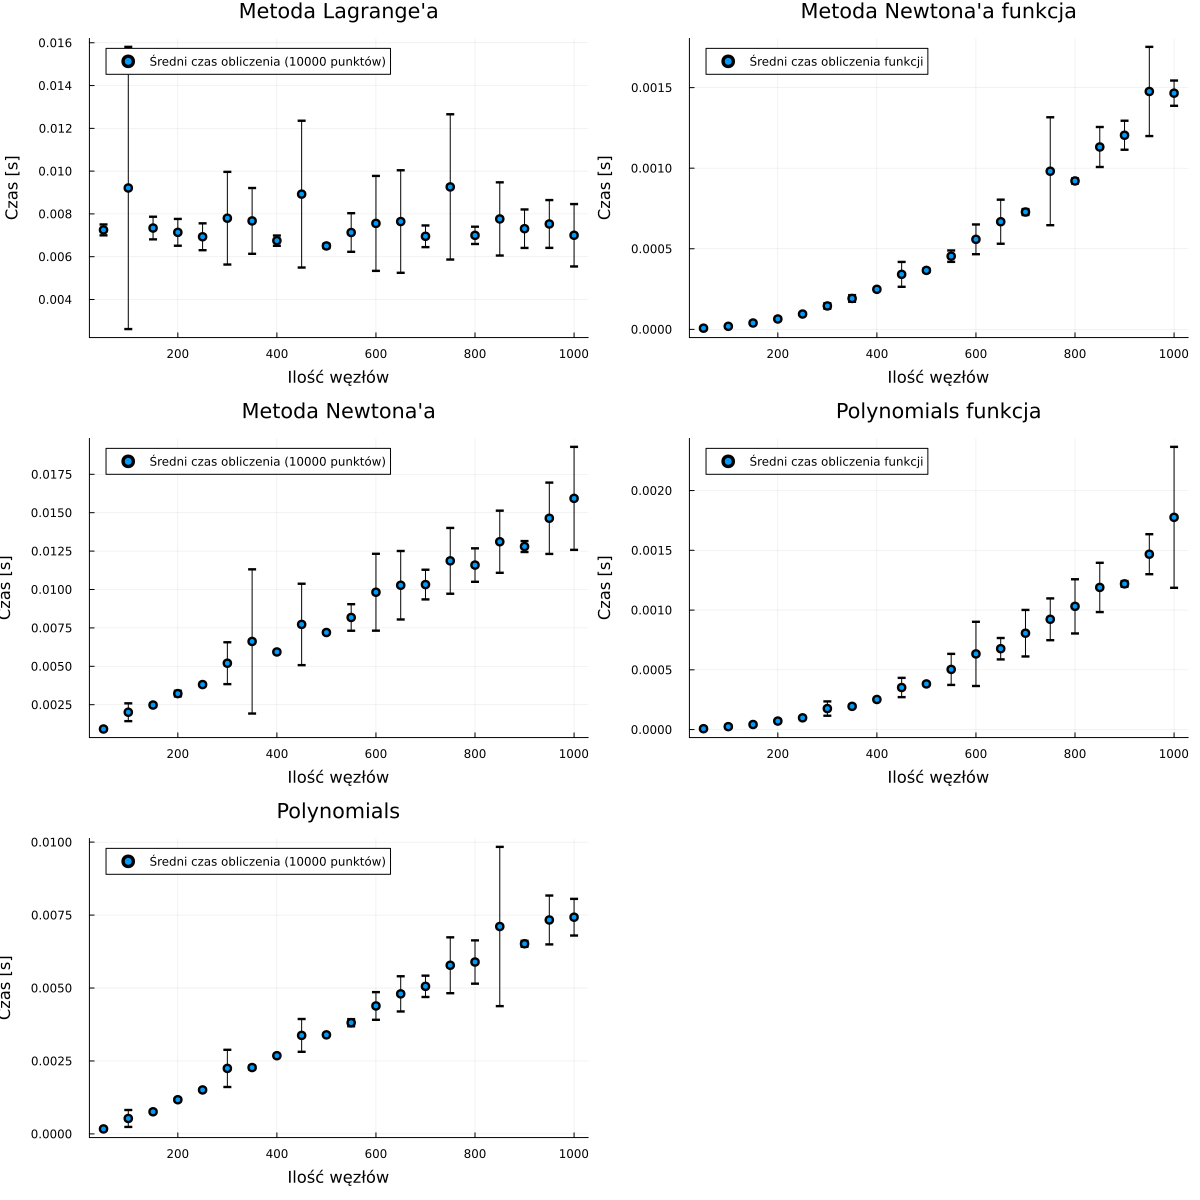

In [13]:
p1 = scatter(
    plot_df.Nodes, 
    plot_df.LagrTest_mean, 
    yerr = plot_df.LagrTest_std, 
    label = "Średni czas obliczenia (10000 punktów)", 
    xlabel = "Ilość węzłów", 
    ylabel = "Czas [s]", 
    title = "Metoda Lagrange'a", 
    legend = :topleft, 
)
p2 = scatter(
    plot_df.Nodes, 
    plot_df.NewtCalc_mean, 
    yerr = plot_df.NewtCalc_std, 
    label = "Średni czas obliczenia funkcji", 
    xlabel = "Ilość węzłów", 
    ylabel = "Czas [s]", 
    title = "Metoda Newtona'a funkcja", 
    legend = :topleft, 
)
p3 = scatter(
    plot_df.Nodes, 
    plot_df.NewtTest_mean, 
    yerr = plot_df.NewtTest_std, 
    label = "Średni czas obliczenia (10000 punktów)", 
    xlabel = "Ilość węzłów", 
    ylabel = "Czas [s]", 
    title = "Metoda Newtona'a", 
    legend = :topleft, 
)
p4 = scatter(
    plot_df.Nodes, 
    plot_df.PolynCalc_mean, 
    yerr = plot_df.PolynCalc_std, 
    label = "Średni czas obliczenia funkcji", 
    xlabel = "Ilość węzłów", 
    ylabel = "Czas [s]", 
    title = "Polynomials funkcja", 
    legend = :topleft, 
)
p5 = scatter(
    plot_df.Nodes, 
    plot_df.PolynTest_mean, 
    yerr = plot_df.PolynTest_std, 
    label = "Średni czas obliczenia (10000 punktów)", 
    xlabel = "Ilość węzłów", 
    ylabel = "Czas [s]", 
    title = "Polynomials", 
    legend = :topleft, 
)


plot(p1, p2, p3, p4, p5, layout = (3, 2), size = (1200, 1200))

## Zadanie 5 - Algorytm Neville'a

In [14]:
function neville_interpolation(x_vals, y_vals, x)
    n = length(x_vals)
    P = copy(y_vals)
    
    for j in 2:n
        for i in n:-1:j
            P[i] = (x - x_vals[i-j+1]) * P[i] - (x - x_vals[i]) * P[i-1]
            P[i] /= (x_vals[i] - x_vals[i-j+1])
        end
    end
    return P[n]
end


neville_interpolation (generic function with 1 method)

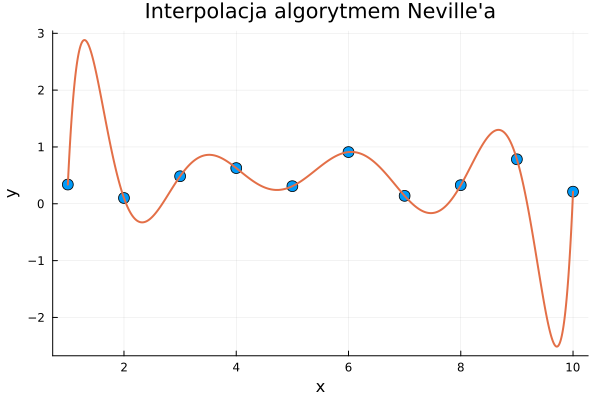

In [15]:
poly_interp = [neville_interpolation(x_vals, y_vals, x) for x in x_range]

scatter(x_vals, y_vals, legend=false, markersize=6)
plot!(x_range, poly_interp, legend=false, linewidth=2)
xlabel!("x")
ylabel!("y")
title!("Interpolacja algorytmem Neville'a")

In [16]:
polynom_calc = fit(x_vals, y_vals)
points = [1, pi, sqrt(2), 5.12345, 8.5, 9.5555, 10]
println("Neville \t\tPolynomial\t\tRóżnica")
for point in points
    println(neville_interpolation(x_vals, y_vals, point), "\t", polynom_calc(point), "\t", abs(neville_interpolation(x_vals, y_vals, point) - polynom_calc(point)))
end

Neville 		Polynomial		Różnica
0.33821328164414827	0.3382132816441299	1.837419105754634e-14
0.6599890428403891	0.6599890428403649	2.4202861936828413e-14
2.666907321197276	2.666907321197217	5.906386491005833e-14
0.3777723897083793	0.3777723897047153	3.664013537019173e-12
1.1960705488043715	1.1960705489400532	1.3568168810706993e-10
-2.1076295771849254	-2.1076295768627658	3.221596323044196e-10
0.2129965492600716	0.2129965494438011	1.837294760775876e-10


## Zadanie 6 - Interpolacja funkcjami sklejanymi, efekt Rungego

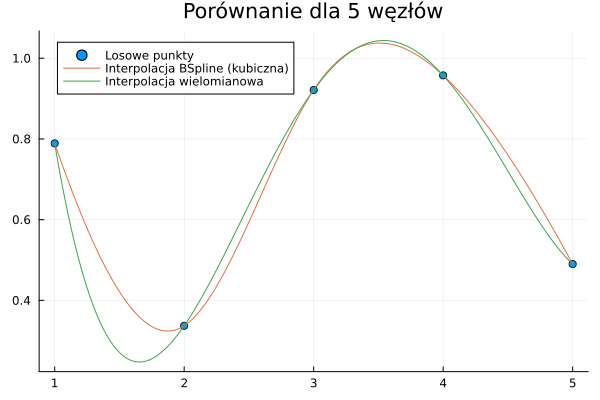

In [17]:
x_nodes_5 = 1:5
y_values_5 = [rand() for x in x_nodes_5]
x_smooth_5 = 1:0.01:5
scatter(x_nodes_5, y_values_5, label="Losowe punkty")
f_bspline_5 = interpolate(y_values_5, BSpline(Cubic(Natural(OnCell()))))
y_smooth_bspline_5 = [f_bspline_5(x) for x in x_smooth_5]
plot!(x_smooth_5, y_smooth_bspline_5, label="Interpolacja BSpline (kubiczna)")
f_poly_5 = fit(x_nodes_5, y_values_5)
y_smooth_poly_5 = [f_poly_5(x) for x in x_smooth_5]
plot!(x_smooth_5, y_smooth_poly_5, label="Interpolacja wielomianowa", title="Porównanie dla 5 węzłów")



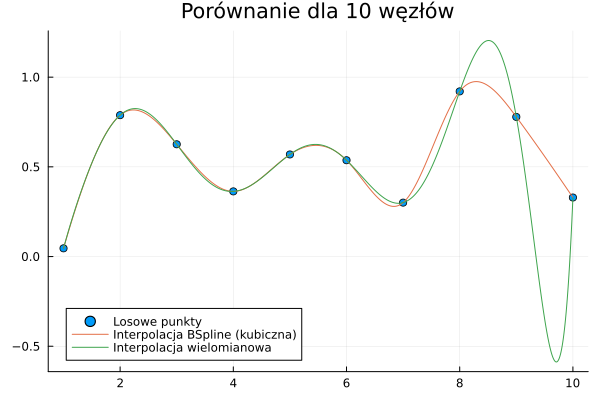

In [18]:
x_nodes_10 = 1:10
y_values_10 = [rand() for x in x_nodes_10]
x_smooth_10 = 1:0.01:10
scatter(x_nodes_10, y_values_10, label="Losowe punkty")
f_bspline_10 = interpolate(y_values_10, BSpline(Cubic(Natural(OnCell()))))
y_smooth_bspline_10 = [f_bspline_10(x) for x in x_smooth_10]
plot!(x_smooth_10, y_smooth_bspline_10, label="Interpolacja BSpline (kubiczna)")
f_poly_10 = fit(x_nodes_10, y_values_10)
y_smooth_poly_10 = [f_poly_10(x) for x in x_smooth_10]
plot!(x_smooth_10, y_smooth_poly_10, label="Interpolacja wielomianowa", title="Porównanie dla 10 węzłów")

Interpolacja wielomianowa `fit` prowadzi do oscylacji na końcach przedziału - efekt Rungego. `BSpline` zapewnia gładkie dopasowanie, eliminuje ten efekt. Jest bardziej stabilnym rozwiązaniem, szczególnie dla większej liczby punktów.